# Measures branching in C++ from python

This notebook looks into a couple of ways to write code, which one is efficient, which one is not when it comes to write fast and short loops. Both experiments are around [branching](https://en.wikipedia.org/wiki/Branch_predictor). The notebook relies on C++ code implemented in [cbenchmark.cpp](https://github.com/sdpython/cpyquickhelper/blob/master/cpyquickhelper/numbers/cbenchmark.cpp) and
[repeat_fct.h](https://github.com/sdpython/cpyquickhelper/blob/master/cpyquickhelper/numbers/repeat_fct.h).

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

[numpy](http://www.numpy.org/) is multithreaded. For an accurate comparison, this needs to be disabled. This can be done as follows or by setting environment variable ``MKL_NUM_THREADS=1``.

In [3]:
try:
    import mkl
    mkl.set_num_threads(1)
except ModuleNotFoundError as e:
    print('mkl not found', e)
    import os
    os.environ['MKL_NUM_THREADS']='1'

## First experiment: comparison C++ syntax

This all started with article [Why is it faster to process a sorted array than an unsorted array?](https://stackoverflow.com/questions/11227809/why-is-it-faster-to-process-a-sorted-array-than-an-unsorted-array/11227902#11227902). It compares different implementation fo the following function for which we try different implementations for the third line in next cell. The last option is taken
[Checking whether a number is positive or negative using bitwise operators](https://stackoverflow.com/questions/3779202/checking-whether-a-number-is-positive-or-negative-using-bitwise-operators) which avoids [branching](https://en.wikipedia.org/wiki/Branch_predictor).

In [4]:
# int nb = 0;
# for(auto it = values.begin(); it != values.end(); ++it)
#     if (*it >= th) nb++; // this line changes
#     if (*it >= th) nb++; // and is repeated 10 times inside the loop.
#     // ... 10 times
# return nb;

The third line is also repeated 10 times to avoid the loop being too significant. 

In [5]:
from cpyquickhelper.numbers.cbenchmark_dot import measure_scenario_A, measure_scenario_B
from cpyquickhelper.numbers.cbenchmark_dot import measure_scenario_C, measure_scenario_D
from cpyquickhelper.numbers.cbenchmark_dot import measure_scenario_E, measure_scenario_F
from cpyquickhelper.numbers.cbenchmark_dot import measure_scenario_G, measure_scenario_H
from cpyquickhelper.numbers.cbenchmark_dot import measure_scenario_I, measure_scenario_J

In [6]:
import pandas

def test_benchmark(label, values, th, repeat=10, number=20):
    funcs = [(k, v) for k, v in globals().copy().items() if k.startswith("measure_scenario")]
    rows = []
    for k, v in funcs:
        exe = v(values, th, repeat, number)
        d = exe.todict()
        d['doc'] = v.__doc__.split('``')[1]
        d['label'] = label
        d['name'] = k
        rows.append(d)        
    df = pandas.DataFrame(rows)
    return df

test_benchmark("sorted", list(range(10)), 5)

c:\Python372_x64\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


average     deviation  \
0  6.716000e-08  2.959256e-07   
1  1.027200e-07  4.491387e-07   
2  1.125950e-07  4.924572e-07   
3  1.975500e-08  8.611007e-08   
4  1.185200e-07  5.166167e-07   
5  1.975500e-08  8.611007e-08   
6  2.173000e-08  9.835338e-08   
7  2.173000e-08  9.835338e-08   
8  3.160500e-08  1.443904e-07   
9  1.975500e-08  8.611007e-08   

                                                 doc   label      max_exec  \
0                         if (values[i] >= th) ++nb;  sorted  1.581000e-06   
1                               if (*it >= th) ++nb;  sorted  2.371000e-06   
2                               if (*it >= th) nb++;  sorted  2.371000e-06   
3                           nb += *it >= th ? 1 : 0;  sorted  3.960000e-07   
4                            if (*it >= th) nb += 1;  sorted  2.371000e-06   
5                     nb += (*it - th) >= 0 ? 1 : 0;  sorted  3.960000e-07   
6                      nb += (*it - th) < 0 ? 1 : 0;  sorted  7.900000e-07   
7                            nb += *it < th ? 1 : 0;  sorted  7.900000e-07   
8  nb += 1 ^ ((unsigned int)(*it) >> (sizeof(int)...  sorted  7.900000e-07   
9                     nb += values[i] >= th ? 1 : 0;  sorted  3.960000e-07   

       min_exec                name  number  repeat  
0  1.185000e-06  measure_scenario_A    20.0    10.0  
1  1.975000e-06  measure_scenario_B    20.0    10.0  
2  1.975000e-06  measure_scenario_C    20.0    10.0  
3  3.950000e-07  measure_scenario_D    20.0    10.0  
4  2.370000e-06  measure_scenario_E    20.0    10.0  
5  3.950000e-07  measure_scenario_F    20.0    10.0  
6  3.950000e-07  measure_scenario_G    20.0    10.0  
7  3.950000e-07  measure_scenario_H    20.0    10.0  
8  3.950000e-07  measure_scenario_I    20.0    10.0  
9  3.950000e-07  measure_scenario_J    20.0    10.0

Times are not very conclusive on such small lists.

In [7]:
values = list(range(100000))
df_sorted = test_benchmark("sorted", values, len(values)//2, repeat=200)
df_sorted

average  deviation                                                doc  \
0  0.000996   0.004362                         if (values[i] >= th) ++nb;   
1  0.001136   0.004973                               if (*it >= th) ++nb;   
2  0.001111   0.004872                               if (*it >= th) nb++;   
3  0.000118   0.000520                           nb += *it >= th ? 1 : 0;   
4  0.001112   0.004880                            if (*it >= th) nb += 1;   
5  0.000122   0.000538                     nb += (*it - th) >= 0 ? 1 : 0;   
6  0.000132   0.000583                      nb += (*it - th) < 0 ? 1 : 0;   
7  0.000122   0.000543                            nb += *it < th ? 1 : 0;   
8  0.000199   0.000875  nb += 1 ^ ((unsigned int)(*it) >> (sizeof(int)...   
9  0.000136   0.000601                     nb += values[i] >= th ? 1 : 0;   

    label  max_exec  min_exec                name  number  repeat  
0  sorted  0.025029  0.015770  measure_scenario_A    20.0   200.0  
1  sorted  0.033192  0.017099  measure_scenario_B    20.0   200.0  
2  sorted  0.030524  0.015742  measure_scenario_C    20.0   200.0  
3  sorted  0.003292  0.001379  measure_scenario_D    20.0   200.0  
4  sorted  0.036103  0.015793  measure_scenario_E    20.0   200.0  
5  sorted  0.005168  0.001390  measure_scenario_F    20.0   200.0  
6  sorted  0.004676  0.001611  measure_scenario_G    20.0   200.0  
7  sorted  0.006333  0.001431  measure_scenario_H    20.0   200.0  
8  sorted  0.004979  0.002549  measure_scenario_I    20.0   200.0  
9  sorted  0.003199  0.001697  measure_scenario_J    20.0   200.0

The article some implementations will be slower if the values are not sorted.

In [8]:
import random
random.shuffle(values)
values = values.copy()
values[:10]

[82838, 57977, 7062, 55164, 28778, 92071, 11672, 25981, 77501, 51199]

In [9]:
df_shuffled = test_benchmark("shuffled", values, len(values)//2, repeat=200)
df_shuffled

average  deviation                                                doc  \
0  0.001170   0.005128                         if (values[i] >= th) ++nb;   
1  0.001180   0.005158                               if (*it >= th) ++nb;   
2  0.001165   0.005117                               if (*it >= th) nb++;   
3  0.000119   0.000538                           nb += *it >= th ? 1 : 0;   
4  0.001099   0.004814                            if (*it >= th) nb += 1;   
5  0.000123   0.000546                     nb += (*it - th) >= 0 ? 1 : 0;   
6  0.000126   0.000560                      nb += (*it - th) < 0 ? 1 : 0;   
7  0.000120   0.000529                            nb += *it < th ? 1 : 0;   
8  0.000198   0.000873  nb += 1 ^ ((unsigned int)(*it) >> (sizeof(int)...   
9  0.000135   0.000596                     nb += values[i] >= th ? 1 : 0;   

      label  max_exec  min_exec                name  number  repeat  
0  shuffled  0.033840  0.015449  measure_scenario_A    20.0   200.0  
1  shuffled  0.029402  0.018244  measure_scenario_B    20.0   200.0  
2  shuffled  0.041069  0.017536  measure_scenario_C    20.0   200.0  
3  shuffled  0.006390  0.001427  measure_scenario_D    20.0   200.0  
4  shuffled  0.033427  0.016986  measure_scenario_E    20.0   200.0  
5  shuffled  0.003991  0.001361  measure_scenario_F    20.0   200.0  
6  shuffled  0.003168  0.001566  measure_scenario_G    20.0   200.0  
7  shuffled  0.002925  0.001334  measure_scenario_H    20.0   200.0  
8  shuffled  0.005513  0.002699  measure_scenario_I    20.0   200.0  
9  shuffled  0.004890  0.001842  measure_scenario_J    20.0   200.0

In [10]:
df = pandas.concat([df_sorted, df_shuffled])
dfg = df[["doc", "label", "average"]].pivot("doc", "label", "average")

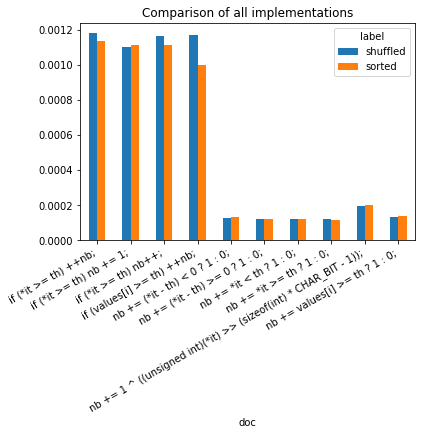

In [11]:
ax = dfg.plot.bar(rot=30)
labels = [l.get_text() for l in ax.get_xticklabels()]
ax.set_xticklabels(labels, ha='right')
ax.set_title("Comparison of all implementations");

It seems that inline tests (``cond ? value1 : value2``) do not stop the branching and it should be used whenever possible.

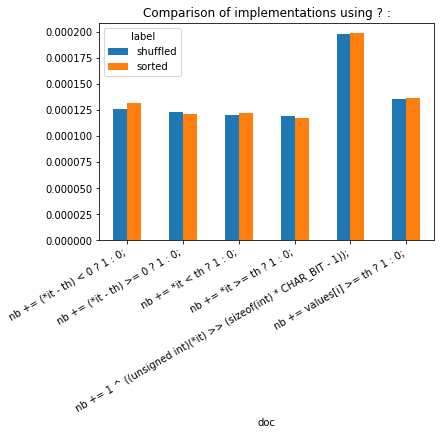

In [12]:
sdf = df[["doc", "label", "average"]]
dfg2 = sdf[sdf.doc.str.contains('[?^]')].pivot("doc", "label", "average")
ax = dfg2.plot.bar(rot=30)
labels = [l.get_text() for l in ax.get_xticklabels()]
ax.set_xticklabels(labels, ha='right')
ax.set_title("Comparison of implementations using ? :");

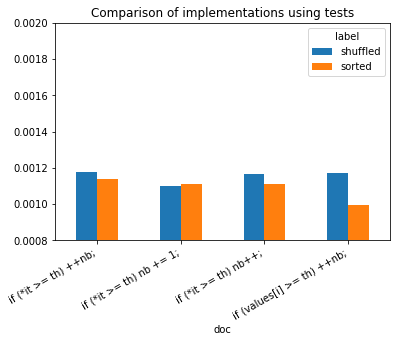

In [13]:
sdf = df[["doc", "label", "average"]]
dfg2 = sdf[sdf.doc.str.contains('if')].pivot("doc", "label", "average")
ax = dfg2.plot.bar(rot=30)
labels = [l.get_text() for l in ax.get_xticklabels()]
ax.set_xticklabels(labels, ha='right')
ax.set_ylim([0.0008, 0.0020])
ax.set_title("Comparison of implementations using tests");

*sorted*, *not sorted* does not seem to have a real impact in this case. It shows *branching* really slows down the execution of a program. Branching happens whenever the program meets a loop condition or a test. Iterator ``*it`` are faster than accessing an array with notation ``[i]`` which adds a cost due to an extra addition.

## Second experiment: dot product

The goal is to compare the dot product from [numpy.dot](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.dot.html) and a couple of implementation in C++ which look like this:

In [14]:
# float vector_dot_product_pointer(const float *p1, const float *p2, size_t size)
# {
#     float sum = 0;
#     const float * end1 = p1 + size;
#     for(; p1 != end1; ++p1, ++p2)
#         sum += *p1 * *p2;
#     return sum;
# }
# 
# 
# float vector_dot_product(py::array_t<float> v1, py::array_t<float> v2)
# {
#     if (v1.ndim() != v2.ndim())
#         throw std::runtime_error("Vector v1 and v2 must have the same dimension.");
#     if (v1.ndim() != 1)
#         throw std::runtime_error("Vector v1 and v2 must be vectors.");
#     return vector_dot_product_pointer(v1.data(0), v2.data(0), v1.shape(0));
# }

### numpy vs C++

In [15]:
%matplotlib inline

In [16]:
import numpy

def simple_dot(values):
    return numpy.dot(values, values)

values = list(range(10000000))
values = numpy.array(values, dtype=numpy.float32)
vect = values / numpy.max(values)
simple_dot(vect)

3333333.2

In [17]:
vect.dtype

dtype('float32')

In [18]:
from timeit import Timer

def measure_time(stmt, context, repeat=10, number=50):
    tim = Timer(stmt, globals=context)
    res = numpy.array(tim.repeat(repeat=repeat, number=number))
    mean = numpy.mean(res)
    dev = numpy.mean(res ** 2)
    dev = (dev - mean**2) ** 0.5
    return dict(average=mean, deviation=dev, min_exec=numpy.min(res),
                max_exec=numpy.max(res), repeat=repeat, number=number,
                size=context['values'].shape[0])

measure_time("simple_dot(values)", context=dict(simple_dot=simple_dot, values=vect))

{'average': 0.15912354850000837,
 'deviation': 0.004389782861004863,
 'min_exec': 0.15188136199998326,
 'max_exec': 0.16728480599999784,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [19]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("simple_dot(values)", repeat=100,
                     context=dict(simple_dot=simple_dot, values=vect[:i].copy()))
    res.append(t)

import pandas
dot = pandas.DataFrame(res)
dot.tail()

average  deviation  max_exec  min_exec  number  repeat    size
75  0.001825   0.000333  0.002845  0.001043      50     100  187510
76  0.001956   0.000725  0.005158  0.001111      50     100  190010
77  0.001838   0.000574  0.003753  0.001045      50     100  192510
78  0.001765   0.000461  0.003408  0.001056      50     100  195010
79  0.001899   0.000695  0.004939  0.001160      50     100  197510

In [20]:
res = []
for i in range(100000, 10000000, 1000000):
    t = measure_time("simple_dot(values)", repeat=10,
                     context=dict(simple_dot=simple_dot, values=vect[:i].copy()))
    res.append(t)
    
huge_dot = pandas.DataFrame(res)
huge_dot.head()

average  deviation  max_exec  min_exec  number  repeat     size
0  0.000817   0.000040  0.000907  0.000770      50      10   100000
1  0.013630   0.001590  0.016657  0.011661      50      10  1100000
2  0.037408   0.002781  0.041095  0.031552      50      10  2100000
3  0.049072   0.003388  0.055567  0.044804      50      10  3100000
4  0.064704   0.001538  0.067962  0.062106      50      10  4100000

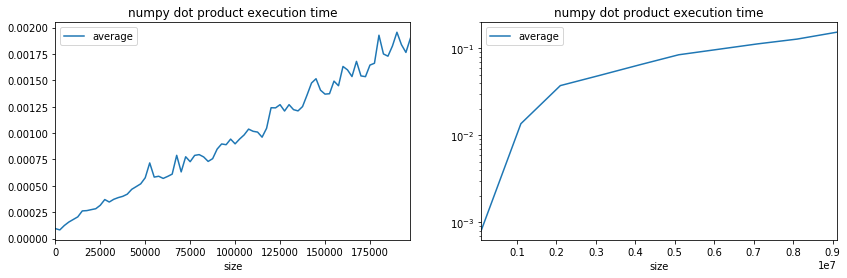

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0])
huge_dot.plot(x='size', y="average", ax=ax[1], logy=True)
ax[0].set_title("numpy dot product execution time");
ax[1].set_title("numpy dot product execution time");

Now the custom implementation. We start with an empty function to get a sense of the cost due to to pybind11.

In [22]:
from cpyquickhelper.numbers.cbenchmark_dot import empty_vector_dot_product
empty_vector_dot_product(vect, vect)

0.0

In [23]:
def empty_c11_dot(vect):
    return empty_vector_dot_product(vect, vect)

measure_time("empty_c11_dot(values)", context=dict(empty_c11_dot=empty_c11_dot, values=vect), repeat=10)

{'average': 0.00010773330000688475,
 'deviation': 2.4357745040527937e-05,
 'min_exec': 6.716000001460998e-05,
 'max_exec': 0.00014380200002506172,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

Very small. It should not pollute our experiments.

In [24]:
from cpyquickhelper.numbers.cbenchmark_dot import vector_dot_product
vector_dot_product(vect, vect)

3334629.0

In [25]:
def c11_dot(vect):
    return vector_dot_product(vect, vect)

measure_time("c11_dot(values)", context=dict(c11_dot=c11_dot, values=vect), repeat=10)

{'average': 1.0864936006999983,
 'deviation': 0.042114970512102286,
 'min_exec': 0.9931970420000198,
 'max_exec': 1.1422908499999949,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [26]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("c11_dot(values)", repeat=10,
                     context=dict(c11_dot=c11_dot, values=vect[:i].copy()))
    res.append(t)

import pandas
cus_dot = pandas.DataFrame(res)
cus_dot.tail()

average  deviation  max_exec  min_exec  number  repeat    size
75  0.015233   0.001483  0.018811  0.013971      50      10  187510
76  0.018793   0.003738  0.024941  0.014803      50      10  190010
77  0.024152   0.001447  0.027682  0.021687      50      10  192510
78  0.022668   0.001428  0.024472  0.019594      50      10  195010
79  0.022919   0.002025  0.025360  0.018967      50      10  197510

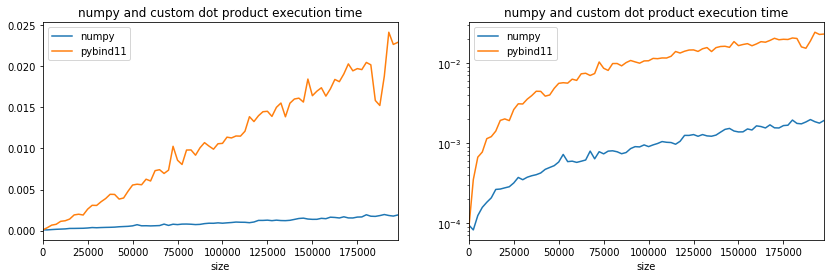

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0], label="numpy")
cus_dot.plot(x='size', y="average", ax=ax[0], label="pybind11")
dot.plot(x='size', y="average", ax=ax[1], label="numpy", logy=True)
cus_dot.plot(x='size', y="average", ax=ax[1], label="pybind11")
ax[0].set_title("numpy and custom dot product execution time");
ax[1].set_title("numpy and custom dot product execution time");

Pretty slow. Let's see what it does to compute dot product 16 by 16.

### BLAS

Internally, [numpy](http://www.numpy.org/) is using [BLAS](http://www.netlib.org/blas/). A direct call to it should give the same results.

In [28]:
from cpyquickhelper.numbers.direct_blas_lapack import cblas_sdot

def blas_dot(vect):
    return cblas_sdot(vect, vect)

measure_time("blas_dot(values)", context=dict(blas_dot=blas_dot, values=vect), repeat=10)

{'average': 0.1616296600000055,
 'deviation': 0.008257471136607717,
 'min_exec': 0.15190743599998768,
 'max_exec': 0.1832800530000327,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [29]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("blas_dot(values)", repeat=10,
                     context=dict(blas_dot=blas_dot, values=vect[:i].copy()))
    res.append(t)

import pandas
blas_dot = pandas.DataFrame(res)
blas_dot.tail()

average  deviation  max_exec  min_exec  number  repeat    size
75  0.001986   0.000253  0.002141  0.001257      50      10  187510
76  0.001791   0.000320  0.002167  0.001218      50      10  190010
77  0.001674   0.000321  0.002168  0.001297      50      10  192510
78  0.001711   0.000432  0.002237  0.001165      50      10  195010
79  0.001891   0.000296  0.002265  0.001369      50      10  197510

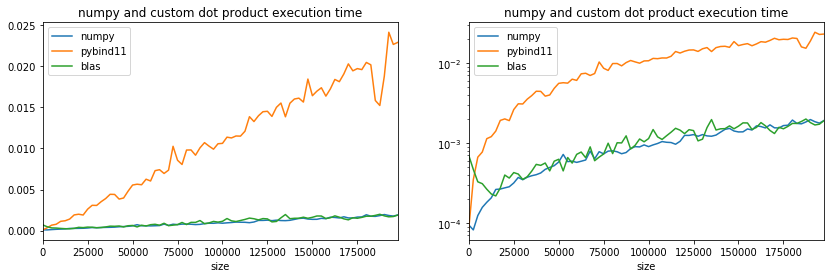

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0], label="numpy")
cus_dot.plot(x='size', y="average", ax=ax[0], label="pybind11")
blas_dot.plot(x='size', y="average", ax=ax[0], label="blas")
dot.plot(x='size', y="average", ax=ax[1], label="numpy", logy=True)
cus_dot.plot(x='size', y="average", ax=ax[1], label="pybind11")
blas_dot.plot(x='size', y="average", ax=ax[1], label="blas")
ax[0].set_title("numpy and custom dot product execution time");
ax[1].set_title("numpy and custom dot product execution time");

### Use of branching: 16 multplications in one row

The code looks like what follows. If there is more than 16 multiplications left, we use function *vector_dot_product_pointer16*, otherwise, there are done one by one like the previous function.

In [31]:
# float vector_dot_product_pointer16(const float *p1, const float *p2)
# {
#     float sum = 0;
#     
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
# 
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
# 
#     return sum;
# }
# 
# #define BYN 16
# 
# float vector_dot_product_pointer16(const float *p1, const float *p2, size_t size)
# {
#     float sum = 0;
#     size_t i = 0;
#     if (size >= BYN) {
#         size_t size_ = size - BYN;
#         for(; i < size_; i += BYN, p1 += BYN, p2 += BYN)
#             sum += vector_dot_product_pointer16(p1, p2);
#     }
#     for(; i < size; ++p1, ++p2, ++i)
#         sum += *p1 * *p2;
#     return sum;
# }
# 
# float vector_dot_product16(py::array_t<float> v1, py::array_t<float> v2)
# {
#     if (v1.ndim() != v2.ndim())
#         throw std::runtime_error("Vector v1 and v2 must have the same dimension.");
#     if (v1.ndim() != 1)
#         throw std::runtime_error("Vector v1 and v2 must be vectors.");
#     return vector_dot_product_pointer16(v1.data(0), v2.data(0), v1.shape(0));
# }

In [32]:
from cpyquickhelper.numbers.cbenchmark_dot import vector_dot_product16
vector_dot_product16(vect, vect)

3333331.75

In [33]:
def c11_dot16(vect):
    return vector_dot_product16(vect, vect)

measure_time("c11_dot16(values)", context=dict(c11_dot16=c11_dot16, values=vect), repeat=10)

{'average': 0.5281810741000073,
 'deviation': 0.012226152774555453,
 'min_exec': 0.5138093719999688,
 'max_exec': 0.5604131869999947,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [34]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("c11_dot16(values)", repeat=10,
                     context=dict(c11_dot16=c11_dot16, values=vect[:i].copy()))
    res.append(t)

cus_dot16 = pandas.DataFrame(res)
cus_dot16.tail()

average  deviation  max_exec  min_exec  number  repeat    size
75  0.009924   0.000532  0.010651  0.008707      50      10  187510
76  0.009555   0.000616  0.010573  0.008759      50      10  190010
77  0.009795   0.000584  0.010818  0.008984      50      10  192510
78  0.010344   0.000511  0.011001  0.009142      50      10  195010
79  0.010396   0.000958  0.011471  0.008140      50      10  197510

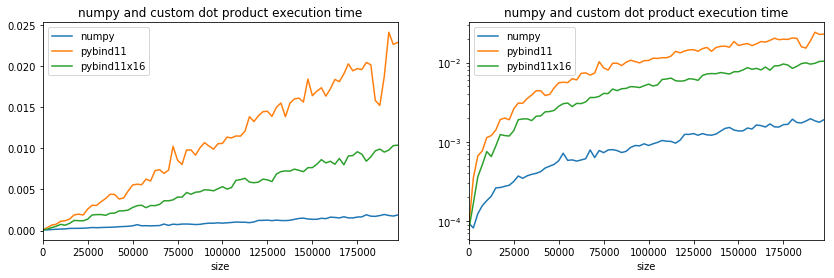

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0], label="numpy")
cus_dot.plot(x='size', y="average", ax=ax[0], label="pybind11")
cus_dot16.plot(x='size', y="average", ax=ax[0], label="pybind11x16")
dot.plot(x='size', y="average", ax=ax[1], label="numpy", logy=True)
cus_dot.plot(x='size', y="average", ax=ax[1], label="pybind11")
cus_dot16.plot(x='size', y="average", ax=ax[1], label="pybind11x16")
ax[0].set_title("numpy and custom dot product execution time");
ax[1].set_title("numpy and custom dot product execution time");

We are far from *numpy* but the branching has clearly a huge impact and the fact the loop condition is evaluated only every 16 iterations does not explain this gain. Next experiment with [SSE](https://fr.wikipedia.org/wiki/Streaming_SIMD_Extensions) instructions.

### Optimized to remove function call

We remove the function call to get the following version.

In [36]:
# float vector_dot_product_pointer16_nofcall(const float *p1, const float *p2, size_t size)
# {
#     float sum = 0;    
#     const float * end = p1 + size;
#     if (size >= BYN) {
#         #if(BYN != 16)
#             #error "BYN must be equal to 16";
#         #endif
#         unsigned int size_ = (unsigned int) size;
#         size_ = size_ >> 4;  // division by 16=2^4
#         size_ = size_ << 4;  // multiplication by 16=2^4
#         const float * end_ = p1 + size_;
#         for(; p1 != end_;)
#         {
#             sum += *p1 * *p2; ++p1, ++p2;
#             sum += *p1 * *p2; ++p1, ++p2;
#             sum += *p1 * *p2; ++p1, ++p2;
#             sum += *p1 * *p2; ++p1, ++p2;
#             
#             sum += *p1 * *p2; ++p1, ++p2;
#             sum += *p1 * *p2; ++p1, ++p2;
#             sum += *p1 * *p2; ++p1, ++p2;
#             sum += *p1 * *p2; ++p1, ++p2;
# 
#             sum += *p1 * *p2; ++p1, ++p2;
#             sum += *p1 * *p2; ++p1, ++p2;
#             sum += *p1 * *p2; ++p1, ++p2;
#             sum += *p1 * *p2; ++p1, ++p2;
#             
#             sum += *p1 * *p2; ++p1, ++p2;
#             sum += *p1 * *p2; ++p1, ++p2;
#             sum += *p1 * *p2; ++p1, ++p2;
#             sum += *p1 * *p2; ++p1, ++p2;
#         }
#     }
#     for(; p1 != end; ++p1, ++p2)
#         sum += *p1 * *p2;
#     return sum;
# }
# 
# float vector_dot_product16_nofcall(py::array_t<float> v1, py::array_t<float> v2)
# {
#     if (v1.ndim() != v2.ndim())
#         throw std::runtime_error("Vector v1 and v2 must have the same dimension.");
#     if (v1.ndim() != 1)
#         throw std::runtime_error("Vector v1 and v2 must be vectors.");
#     return vector_dot_product_pointer16_nofcall(v1.data(0), v2.data(0), v1.shape(0));
# }

In [37]:
from cpyquickhelper.numbers.cbenchmark_dot import vector_dot_product16_nofcall
vector_dot_product16_nofcall(vect, vect)

3334629.0

In [38]:
def c11_dot16_nofcall(vect):
    return vector_dot_product16_nofcall(vect, vect)

measure_time("c11_dot16_nofcall(values)",
             context=dict(c11_dot16_nofcall=c11_dot16_nofcall, values=vect), repeat=10)

{'average': 1.1714699287000259,
 'deviation': 0.023601121453714912,
 'min_exec': 1.112935812000046,
 'max_exec': 1.2079828480000288,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [39]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("c11_dot16_nofcall(values)", repeat=10,
                     context=dict(c11_dot16_nofcall=c11_dot16_nofcall, values=vect[:i].copy()))
    res.append(t)

cus_dot16_nofcall = pandas.DataFrame(res)
cus_dot16_nofcall.tail()

average  deviation  max_exec  min_exec  number  repeat    size
75  0.022504   0.001032  0.024698  0.020807      50      10  187510
76  0.021753   0.001856  0.025182  0.018921      50      10  190010
77  0.020330   0.001574  0.022484  0.018413      50      10  192510
78  0.024797   0.003121  0.032145  0.021938      50      10  195010
79  0.021374   0.001674  0.023559  0.018869      50      10  197510

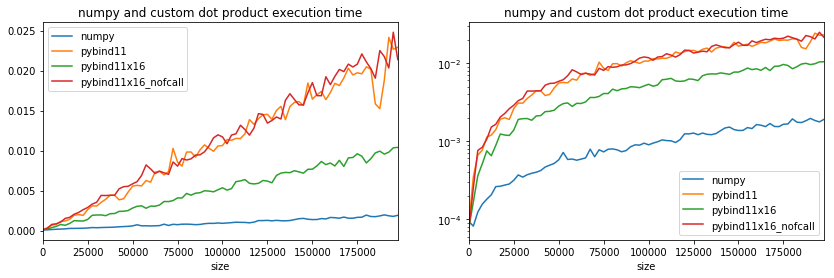

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0], label="numpy")
cus_dot.plot(x='size', y="average", ax=ax[0], label="pybind11")
cus_dot16.plot(x='size', y="average", ax=ax[0], label="pybind11x16")
cus_dot16_nofcall.plot(x='size', y="average", ax=ax[0], label="pybind11x16_nofcall")
dot.plot(x='size', y="average", ax=ax[1], label="numpy", logy=True)
cus_dot.plot(x='size', y="average", ax=ax[1], label="pybind11")
cus_dot16.plot(x='size', y="average", ax=ax[1], label="pybind11x16")
cus_dot16_nofcall.plot(x='size', y="average", ax=ax[1], label="pybind11x16_nofcall")
ax[0].set_title("numpy and custom dot product execution time");
ax[1].set_title("numpy and custom dot product execution time");

Weird, branching did not happen when the code is not inside a separate function.

### SSE instructions

We replace one function in the previous implementation.

In [41]:
# #include <xmmintrin.h>
# 
# float vector_dot_product_pointer16_sse(const float *p1, const float *p2)
# {
#     __m128 c1 = _mm_load_ps(p1);
#     __m128 c2 = _mm_load_ps(p2);
#     __m128 r1 = _mm_mul_ps(c1, c2);
#     
#     p1 += 4;
#     p2 += 4;
#     
#     c1 = _mm_load_ps(p1);
#     c2 = _mm_load_ps(p2);
#     r1 = _mm_add_ps(r1, _mm_mul_ps(c1, c2));
#     
#     p1 += 4;
#     p2 += 4;
#     
#     c1 = _mm_load_ps(p1);
#     c2 = _mm_load_ps(p2);
#     r1 = _mm_add_ps(r1, _mm_mul_ps(c1, c2));
#     
#     p1 += 4;
#     p2 += 4;
#     
#     c1 = _mm_load_ps(p1);
#     c2 = _mm_load_ps(p2);
#     r1 = _mm_add_ps(r1, _mm_mul_ps(c1, c2));
# 
#     float r[4];
#     _mm_store_ps(r, r1);
# 
#     return r[0] + r[1] + r[2] + r[3];
# }

In [42]:
from cpyquickhelper.numbers.cbenchmark_dot import vector_dot_product16_sse
vector_dot_product16_sse(vect, vect)

3333332.0

In [43]:
def c11_dot16_sse(vect):
    return vector_dot_product16_sse(vect, vect)

measure_time("c11_dot16_sse(values)", context=dict(c11_dot16_sse=c11_dot16_sse, values=vect), repeat=10)

{'average': 0.2237774429999945,
 'deviation': 0.023544418873161967,
 'min_exec': 0.20292606199996044,
 'max_exec': 0.2891375500000777,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [44]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("c11_dot16_sse(values)", repeat=10,
                     context=dict(c11_dot16_sse=c11_dot16_sse, values=vect[:i].copy()))
    res.append(t)

cus_dot16_sse = pandas.DataFrame(res)
cus_dot16_sse.tail()

average  deviation  max_exec  min_exec  number  repeat    size
75  0.003277   0.000450  0.003724  0.002355      50      10  187510
76  0.003784   0.000557  0.005109  0.003118      50      10  190010
77  0.003541   0.000874  0.005640  0.002325      50      10  192510
78  0.003505   0.000479  0.003947  0.002496      50      10  195010
79  0.003530   0.000373  0.004012  0.002783      50      10  197510

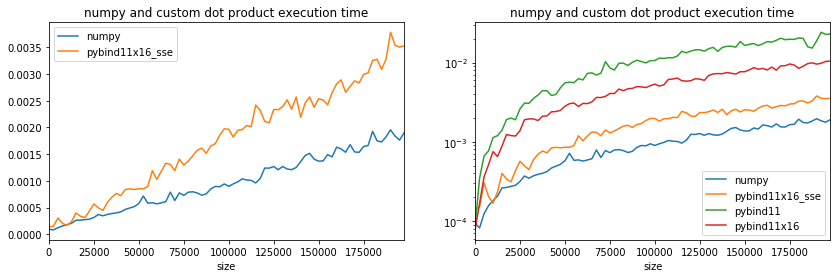

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0], label="numpy")
cus_dot16_sse.plot(x='size', y="average", ax=ax[0], label="pybind11x16_sse")
dot.plot(x='size', y="average", ax=ax[1], label="numpy", logy=True)
cus_dot16_sse.plot(x='size', y="average", ax=ax[1], label="pybind11x16_sse")
cus_dot.plot(x='size', y="average", ax=ax[1], label="pybind11")
cus_dot16.plot(x='size', y="average", ax=ax[1], label="pybind11x16")
ax[0].set_title("numpy and custom dot product execution time");
ax[1].set_title("numpy and custom dot product execution time");

Better even though it is still slower than *numpy*. It is closer. Maybe the compilation option are not optimized, *numpy* was also compiled with the Intel compiler. To be accurate, multi-threading must be disabled on *numpy* side. That's the purpose of the first two lines.

### AVX 512

Last experiment with [AVX 512](https://fr.wikipedia.org/wiki/Advanced_Vector_Extensions) instructions but it does not work on all processor. I could not test it on my laptop as these instructions do not seem to be available. More can be found on wikipedia [CPUs with AVX-512](https://en.wikipedia.org/wiki/AVX-512#CPUs_with_AVX-512).

In [46]:
import platform
platform.processor()

'Intel64 Family 6 Model 78 Stepping 3, GenuineIntel'

In [47]:
import numpy
values = numpy.array(list(range(10000000)), dtype=numpy.float32)
vect = values / numpy.max(values)

In [48]:
from cpyquickhelper.numbers.cbenchmark_dot import vector_dot_product16_avx512
vector_dot_product16_avx512(vect, vect)

3333332.0

In [49]:
def c11_dot16_avx512(vect):
    return vector_dot_product16_avx512(vect, vect)

measure_time("c11_dot16_avx512(values)",
             context=dict(c11_dot16_avx512=c11_dot16_avx512, values=vect), repeat=10)

{'average': 0.2209936032000087,
 'deviation': 0.01601067795994051,
 'min_exec': 0.19949021299999004,
 'max_exec': 0.25032987700001286,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [50]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("c11_dot16_avx512(values)", repeat=10,
                     context=dict(c11_dot16_avx512=c11_dot16_avx512, values=vect[:i].copy()))
    res.append(t)

cus_dot16_avx512 = pandas.DataFrame(res)
cus_dot16_avx512.tail()

average  deviation  max_exec  min_exec  number  repeat    size
75  0.003197   0.000532  0.003852  0.002329      50      10  187510
76  0.004724   0.001165  0.005950  0.003041      50      10  190010
77  0.002940   0.000354  0.003700  0.002442      50      10  192510
78  0.003305   0.000575  0.004290  0.002413      50      10  195010
79  0.003080   0.000438  0.004048  0.002546      50      10  197510

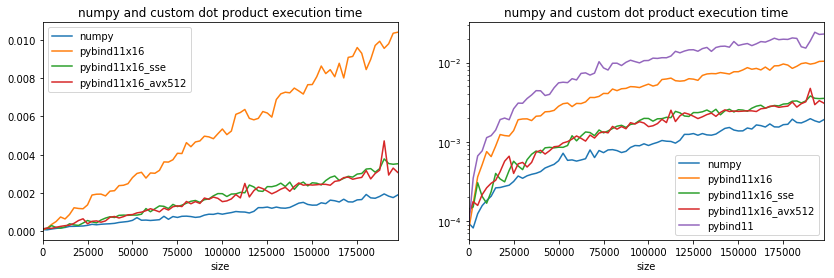

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0], label="numpy")
cus_dot16.plot(x='size', y="average", ax=ax[0], label="pybind11x16")
cus_dot16_sse.plot(x='size', y="average", ax=ax[0], label="pybind11x16_sse")
cus_dot16_avx512.plot(x='size', y="average", ax=ax[0], label="pybind11x16_avx512")
dot.plot(x='size', y="average", ax=ax[1], label="numpy", logy=True)
cus_dot16.plot(x='size', y="average", ax=ax[1], label="pybind11x16")
cus_dot16_sse.plot(x='size', y="average", ax=ax[1], label="pybind11x16_sse")
cus_dot16_avx512.plot(x='size', y="average", ax=ax[1], label="pybind11x16_avx512")
cus_dot.plot(x='size', y="average", ax=ax[1], label="pybind11")
ax[0].set_title("numpy and custom dot product execution time");
ax[1].set_title("numpy and custom dot product execution time");

If the time is the same, it means that options AVX512 are not available.

In [52]:
from cpyquickhelper.numbers.cbenchmark import get_simd_available_option
get_simd_available_option()

'Available options:  __SSE__ __SSE2__ __SSE3__ __SSE4_1__'

### Back to numpy

This article [Why is matrix multiplication faster with numpy than with ctypes in Python?](https://stackoverflow.com/questions/10442365/why-is-matrix-multiplication-faster-with-numpy-than-with-ctypes-in-python) gives some kints on why *numpy* is still faster. By looking at the code of the dot product in *numpy*: [arraytypes.c.src](https://github.com/numpy/numpy/blob/master/numpy/core/src/multiarray/arraytypes.c.src), it seems that *numpy* does a simple dot product without using branching or uses the library [BLAS](http://www.netlib.org/blas/) which is the case in this benchmark (code for dot product: [sdot.c](http://www.netlib.org/clapack/cblas/sdot.c)). And it does use *branching*. See also function [blas_stride](https://github.com/numpy/numpy/blob/master/numpy/core/src/multiarray/common.h#L298). These libraries then play with [compilation options](https://gcc.gnu.org/onlinedocs/gcc/Optimize-Options.html) and optimize for speed. This benchmark does not look into [cython-blis](https://github.com/explosion/cython-blis) which implements some [BLAS](http://www.netlib.org/blas/) functions with an assembly language and has different implementations depending on the platform it is used. A little bit more on C++ optimization [How to optimize C and C++ code in 2018](https://medium.com/@aka.rider/how-to-optimize-c-and-c-code-in-2018-bd4f90a72c2b).